# Градиентный бустинг

## 9.1. Композиции простых алгоритмов

### 9.1.1 Недостатки случайного леса

Случайны лес - это композиции случайных деревьев, которые строятся независимо друг от друга.

**Проблема**

- При большой выборке(или большом количестве признаков) - долгое вычисление

- Если ограничить глубину деревьев - деревья будут недообучаться

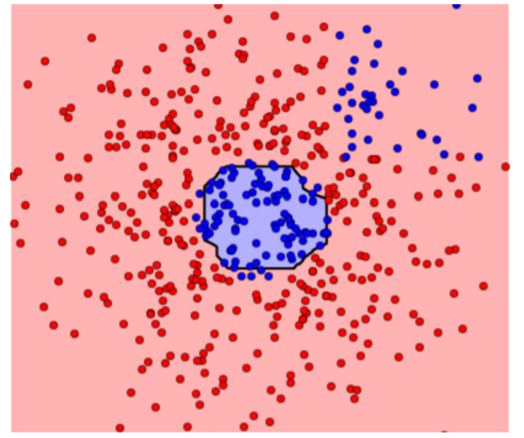

**Вторая проблема**

- Процесс построения деревьев является ненаправленным(параллельным): каждое следующее дерево в композиции никак не зависит от предыдущих. Из-за этого для решения сложных задач необходимо огромное количество деревьев

## 9.1.2. Бустинг: основная идея

**Бустинг** - это подход построения композиций,в рамках которого:

- Базовые алгоритмы строятся последовательно, один за другим

- Каждый следующий алгоритм строится таким образом, чтобы исправить ошибки предыдущего

Благодаря тому, что построение композиций в бустинге является направленным, достаточно использовать простые базовые алгоритмы, наприме, неглубокие деревья

## 9.1.3. Бустинг на примере задачи регрессии

Пусть дана регрессия, в которой в качестве ошибки используется среднеквадратичная ошибка:

$$\Large MSE(a, X) = \frac{1}{\ell}\sum_{i=1}^{\ell}(a(x_i) - y_i)^2$$

Для начала необходимо обучить первый простой алгоритм, например, неглубокое решающее дерево:

$$\Large b_1(x) = \frac{1}{\ell}\sum_{i=1}^{\ell}(b(x_i) - y_i)^2$$

Второй алгоритм должен быть обучен таким образом, чтобы композиция первого и второго алгоритмов имела наименьшую из возможных ошибку на обучающей выборке:

$$\Large b_1(x)+b_2(x)=y(x)$$

Таким образом:

$$\Large b_2(x) = y(x)-b_1(x)$$

$$\Large b_2(x) = \frac{1}{\ell}\sum_{i=1}^{\ell}(b(x_i) - (y_i - b_1(x_i)))^2$$

Другими словами, алгоритм $b_2(x)$ улучшает качество работы алгоритма $b_1(x)$

Аналогично можно делать с $N$ алгоритмами

***Процесс продолжается до тех пор, пока ошибка композиции $b_1(x) + ... + b_N(x)$ не будет устраивать.***